In [4]:
import pandas as pd
import numpy as np
import ssl
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
context = ssl._create_unverified_context()
data = urllib.request.urlopen(url, context=context)
df = pd.read_csv(data, sep=';')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
feature_list = df.columns[:-1].values
label = [df.columns[-1]]
print("Feature List: ", feature_list)
print("Label: ", label)

Feature List:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label:  ['quality']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

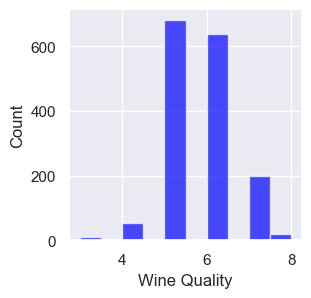

In [11]:
sns.set_theme()

plt.figure(figsize=(3, 3))  
df['quality'].hist(bins=10, color='blue', alpha=0.7)  

plt.xlabel('Wine Quality')
plt.ylabel('Count')

plt.show()

In [12]:
from TrainTestSplit import split_train_test_data 
train_set, test_set = split_train_test_data(df, 0.2)

In [13]:
exploration_set = train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

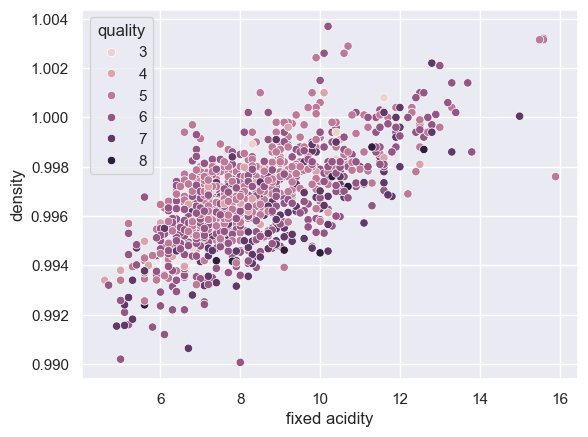

In [14]:
sns.scatterplot(x="fixed acidity", y="density", hue="quality", data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

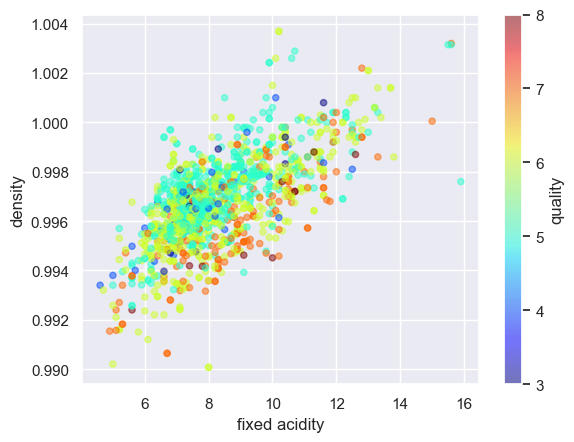

In [15]:
exploration_set.plot(kind="scatter", x="fixed acidity", y="density", alpha=0.5, c="quality", colormap=plt.get_cmap("jet"))

In [16]:
corr_matrix = exploration_set.corr()

In [17]:
corr_matrix["quality"]

fixed acidity           0.121578
volatile acidity       -0.379575
citric acid             0.217522
residual sugar          0.006461
chlorides              -0.126006
free sulfur dioxide    -0.053935
total sulfur dioxide   -0.198117
density                -0.167836
pH                     -0.044892
sulphates               0.243248
alcohol                 0.472915
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

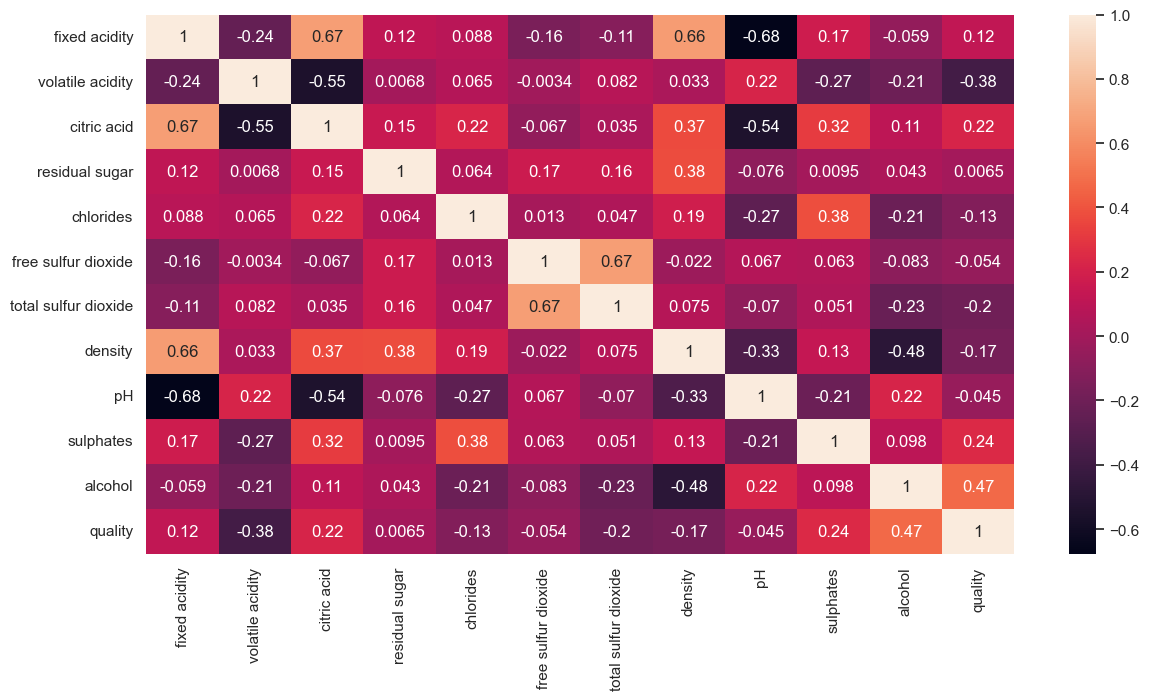

In [18]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>]], dtype=object)

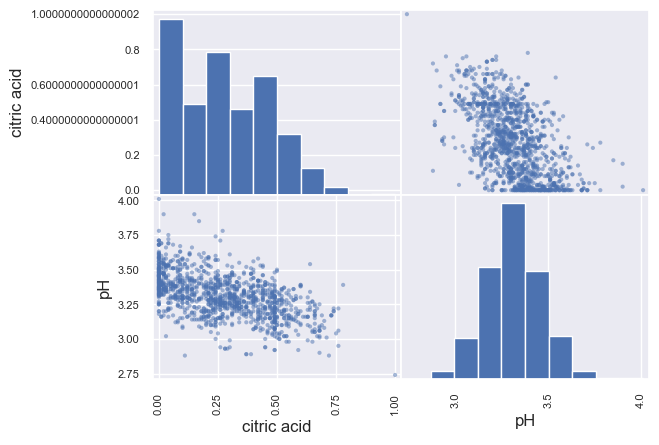

In [19]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH']
scatter_matrix(exploration_set[attribute_list])

In [20]:
wine_features = train_set.drop("quality", axis=1)
wine_labels = train_set['quality'].copy()
# print(wine_features)
# print('....')
# print(wine_labels)

In [21]:
wine_features.isna().sum() #counts number of NaN in each column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [22]:
wine_features.median()

fixed acidity            7.9000
volatile acidity         0.5200
citric acid              0.2600
residual sugar           2.2000
chlorides                0.0800
free sulfur dioxide     14.0000
total sulfur dioxide    38.0000
density                  0.9968
pH                       3.3100
sulphates                0.6200
alcohol                 10.2000
dtype: float64

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([ 7.9   ,  0.52  ,  0.26  ,  2.2   ,  0.08  , 14.    , 38.    ,
        0.9968,  3.31  ,  0.62  , 10.2   ])

In [25]:
tr_features = imputer.transform(wine_features)

In [26]:
print(tr_features)

[[ 9.1    0.765  0.04  ...  3.29   0.54   9.7  ]
 [ 8.7    0.69   0.31  ...  3.48   0.74  11.6  ]
 [ 6.1    0.21   0.4   ...  3.25   0.59  11.9  ]
 ...
 [ 7.2    0.62   0.06  ...  3.51   0.54   9.5  ]
 [ 7.9    0.2    0.35  ...  3.32   0.8   11.9  ]
 [ 5.8    0.29   0.26  ...  3.39   0.54  13.5  ]]


In [27]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

In [28]:
wine_features_tr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7
1,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
2,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
3,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
4,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]
full_pipeline = ColumnTransformer([
    ('num',  transform_pipeline , num_attribs),
    ('cat', OneHotEncoder, cat_attribs),
])